# WeatherPy
----

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import random
import json
import requests
from scipy.stats import linregress
from citipy import citipy
from pprint import pprint
from api_keys import weather_api_key

### Generate Cities List

In [2]:
# Generate random latitude\longitude
sample_size = 10
latitude = []
longitude = []

for x in range (0,sample_size):
    latitude.append(random.randint(-90,90))
    longitude.append(random.randint(-180,180)) 

In [3]:
# Select closest city using citipy library (https://pypi.python.org/pypi/citipy)

cities = []

for x,y in zip(latitude,longitude):
    city=citipy.nearest_city(x,y)  
    cities.append(city.city_name)


### Perform API Calls


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key= weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [5]:
# set up lists to hold reponse info

name = []
lat = []
lon = []
date = []
temp_max = []
hum = []
cloud = []
wind_kmh = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon']) 
        date.append(response['dt'])    
        temp_max.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_kmh.append(response['wind']['speed'])
        print(f"{city} found. Appending data")
        
    except:
       # Append null values
       print(f"{city} not found. Skipping...")
    pass

# Create city ID
city_id = []

for id in range(len(name)):
    city_id.append(id)


upernavik found. Appending data
dubai found. Appending data
mizdah found. Appending data
chicama found. Appending data
jamestown found. Appending data
punta arenas found. Appending data
mataura found. Appending data
rungata not found. Skipping...
jamestown found. Appending data
saleaula not found. Skipping...


### Convert Raw Data to DataFrame


In [6]:
# create a data frame from cities, lat, and temp
weather_data = pd.DataFrame({"City_ID": city_id,
                            "City": name,
                            "Latitude": lat,
                            "Longitude": lon,
                            "Date": date,
                            "Max Temperature (C)": temp_max,
                            "Humidity": hum,
                            "Cloudiness": cloud,
                            "Wind Speed (km/h)": wind_kmh,
                            })

# Convert Unix date
weather_data["Date"]=pd.to_datetime(weather_data["Date"], unit='s')

# Export file as csv
weather_data.to_csv("output_data/cities.csv",index=False, header=True)

weather_data.head()

,City_ID,City,Latitude,Longitude,Date,Max Temperature (C),Humidity,Cloudiness,Wind Speed (km/h)
0,0,Upernavik,72.7868,-56.1549,2021-03-18 07:53:34,-21.87,96,100,5.69
1,1,Dubai,25.2582,55.3047,2021-03-18 07:46:14,35.00,15,0,1.03
2,2,Mizdah,31.4451,12.9801,2021-03-18 07:53:34,11.56,64,96,5.95
3,3,Chicama,-7.8447,-79.1469,2021-03-18 07:53:34,23.12,72,100,1.98
4,4,Jamestown,42.0970,-79.2353,2021-03-18 07:53:34,7.00,70,90,3.05


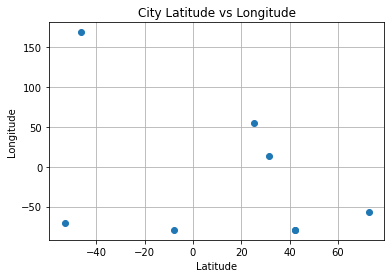

In [7]:
# Review how the sample cities are distributed

plt.scatter(weather_data["Latitude"], weather_data["Longitude"], marker="o")

plt.title("City Latitude vs Longitude")
plt.ylabel("Longitude")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

In [8]:
# Review data
# Remove any cities with humidity > 100%

weather_data.describe()

,City_ID,Latitude,Longitude,Max Temperature (C),Humidity,Cloudiness,Wind Speed (km/h)
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,3.50000,13.312088,-15.942500,10.448750,67.125000,59.500000,3.733750
std,2.44949,44.835474,90.009671,16.214554,23.166709,49.416596,2.628492
min,0.00000,-53.150000,-79.235300,-21.870000,15.000000,0.000000,0.890000
25%,1.75000,-17.431700,-79.169000,7.000000,68.500000,0.000000,1.742500
50%,3.50000,28.351650,-63.535800,10.280000,70.500000,90.000000,3.050000
75%,5.25000,42.097000,23.561250,15.365000,73.750000,97.000000,5.755000
max,7.00000,72.786800,168.864300,35.000000,96.000000,100.000000,8.230000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

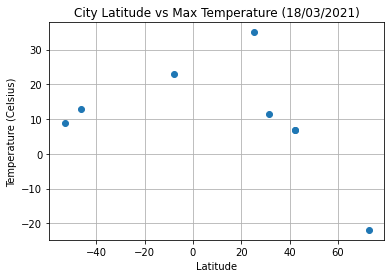

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature (C)"], marker="o")

# Incorporate the other graph properties
current_date = (weather_data["Date"].max()).strftime('%d/%m/%Y')

plt.title(f"City Latitude vs Max Temperature ({current_date})")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Temperature.png")

# Show plot
plt.show()

#### Temparature Analysis
The Equator is at zero latitude, Southern Hemisphere is at negative latitude, and Northen Hemisphere is at positive latitude. As the city get closer to the Equator, the maximum temperature is warmer, especially if the city is also in the Southern Hemisphere. As the city get further away from the Equator and up toward the top of the Northern Hemisphere, the temperature will be at extreme cold level.  

## Latitude vs. Humidity Plot

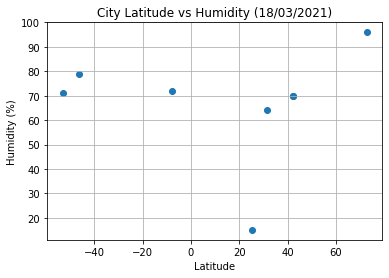

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o")

# Incorporate the other graph properties
current_date = (weather_data["Date"].max()).strftime('%d/%m/%Y')

plt.title(f"City Latitude vs Humidity ({current_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Humidity.png")

# Show plot
plt.show()

#### Humidity Analysis
Some cities in the Northern Hemisphere have lower humidity % as they get closer to the Equator. The longitude may be another factor that influence the level of humidity too.  

## Latitude vs. Cloudiness Plot

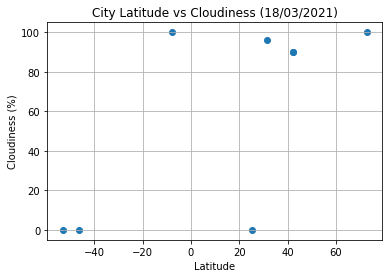

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
current_date = (weather_data["Date"].max()).strftime('%d/%m/%Y')

plt.title(f"City Latitude vs Cloudiness ({current_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Cloudiness.png")

# Show plot
plt.show()

#### Cloudiness Analysis
There is no distinct difference in term of cloudiness to make a solid conclusion.

## Latitude vs. Wind Speed Plot

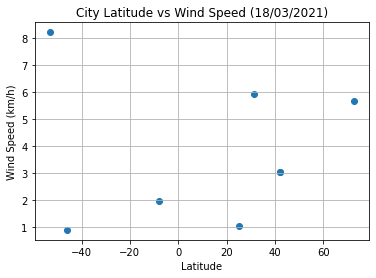

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (km/h)"], marker="o")

# Incorporate the other graph properties
current_date = (weather_data["Date"].max()).strftime('%d/%m/%Y')

plt.title(f"City Latitude vs Wind Speed ({current_date})")
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Wind_Speed.png")

# Show plot
plt.show()

#### Wind Speed Analysis
There is no distinct difference in term of wind speed to make a solid conclusion.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9525061968702808


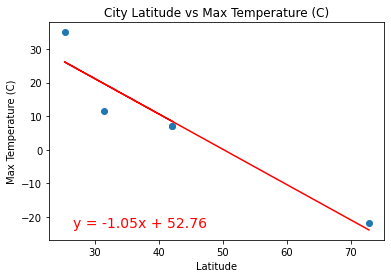

In [13]:
# Create plot data frame
columns = ["Latitude","Max Temperature (C)"]
plot_df = weather_data.loc[weather_data["Latitude"]>=0,columns]

# Scatter plot
x_values=plot_df.iloc[:,0]
y_values=plot_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min()*1.05,y_values.min()*1.05),fontsize=14,color="red")
plt.title(f"City {plot_df.columns[0]} vs {plot_df.columns[1]}")
plt.xlabel(plot_df.columns[0])
plt.ylabel(f"{plot_df.columns[1]}")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.9929907222787814


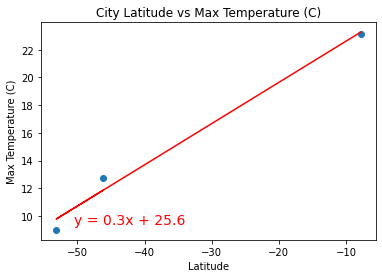

In [14]:
# Create plot data frame
columns = ["Latitude","Max Temperature (C)"]
plot_df = weather_data.loc[weather_data["Latitude"]<0,columns]

# Scatter plot
x_values=plot_df.iloc[:,0]
y_values=plot_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min()*0.95,y_values.min()*1.05),fontsize=14,color="red")
plt.title(f"City {plot_df.columns[0]} vs {plot_df.columns[1]}")
plt.xlabel(plot_df.columns[0])
plt.ylabel(f"{plot_df.columns[1]}")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.8379032231459542


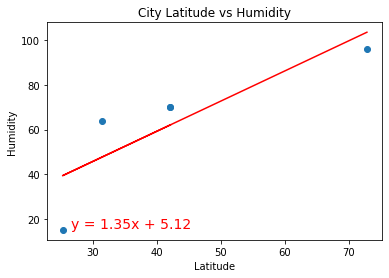

In [15]:
# Create plot data frame
columns = ["Latitude","Humidity"]
plot_df = weather_data.loc[weather_data["Latitude"]>=0,columns]

# Scatter plot
x_values=plot_df.iloc[:,0]
y_values=plot_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min()*1.05,y_values.min()*1.05),fontsize=14,color="red")
plt.title(f"City {plot_df.columns[0]} vs {plot_df.columns[1]}")
plt.xlabel(plot_df.columns[0])
plt.ylabel(f"{plot_df.columns[1]}")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.2624596812895896


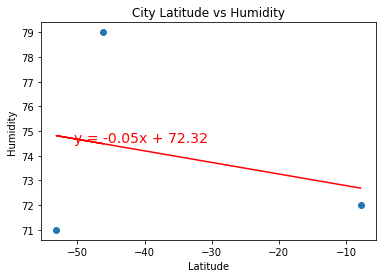

In [16]:
# Create plot data frame
columns = ["Latitude","Humidity"]
plot_df = weather_data.loc[weather_data["Latitude"]<0,columns]

# Scatter plot
x_values=plot_df.iloc[:,0]
y_values=plot_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min()*0.95,y_values.min()*1.05),fontsize=14,color="red")
plt.title(f"City {plot_df.columns[0]} vs {plot_df.columns[1]}")
plt.xlabel(plot_df.columns[0])
plt.ylabel(f"{plot_df.columns[1]}")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.5844737252909633


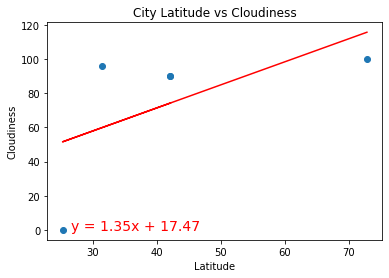

In [17]:
# Create plot data frame
columns = ["Latitude","Cloudiness"]
plot_df = weather_data.loc[weather_data["Latitude"]>=0,columns]

# Scatter plot
x_values=plot_df.iloc[:,0]
y_values=plot_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min()*1.05,y_values.min()*1.05),fontsize=14,color="red")
plt.title(f"City {plot_df.columns[0]} vs {plot_df.columns[1]}")
plt.xlabel(plot_df.columns[0])
plt.ylabel(f"{plot_df.columns[1]}")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.9897832911650697


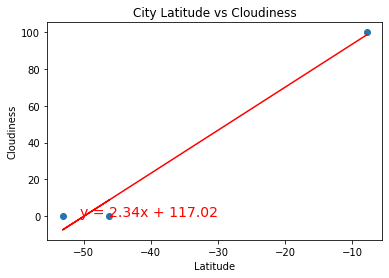

In [18]:
# Create plot data frame
columns = ["Latitude","Cloudiness"]
plot_df = weather_data.loc[weather_data["Latitude"]<0,columns]

# Scatter plot
x_values=plot_df.iloc[:,0]
y_values=plot_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min()*0.95,y_values.min()*1.05),fontsize=14,color="red")
plt.title(f"City {plot_df.columns[0]} vs {plot_df.columns[1]}")
plt.xlabel(plot_df.columns[0])
plt.ylabel(f"{plot_df.columns[1]}")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.5435191785388997


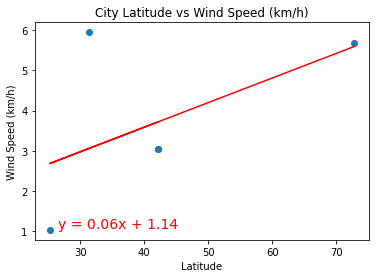

In [19]:
# Create plot data frame
columns = ["Latitude","Wind Speed (km/h)"]
plot_df = weather_data.loc[weather_data["Latitude"]>=0,columns]

# Scatter plot
x_values=plot_df.iloc[:,0]
y_values=plot_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min()*1.05,y_values.min()*1.05),fontsize=14,color="red")
plt.title(f"City {plot_df.columns[0]} vs {plot_df.columns[1]}")
plt.xlabel(plot_df.columns[0])
plt.ylabel(f"{plot_df.columns[1]}")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.5043497946385518


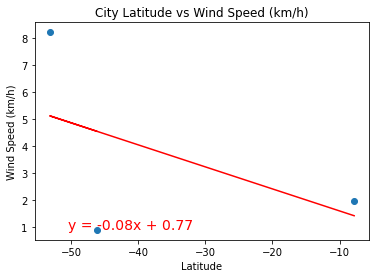

In [20]:
# Create plot data frame
columns = ["Latitude","Wind Speed (km/h)"]
plot_df = weather_data.loc[weather_data["Latitude"]<0,columns]

# Scatter plot
x_values=plot_df.iloc[:,0]
y_values=plot_df.iloc[:,1]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(x_values.min()*0.95,y_values.min()*1.05),fontsize=14,color="red")
plt.title(f"City {plot_df.columns[0]} vs {plot_df.columns[1]}")
plt.xlabel(plot_df.columns[0])
plt.ylabel(f"{plot_df.columns[1]}")

# R-value
print(f"The r-value is: {rvalue}")
plt.show()